## Linear Regression with Advertising Dataset

In **Advertising.csv** data;

* We will look at the relationship between **TV** and **Sales**.

* Our aim is to model the relationship between TV budget and Sales with Linear Regression.

* We will build a linear model for this.

Steps:

1- First, let's examine the raw data

2- Let's import the data

3- Let's examine the data (head, describe, info)

4- Visualize the data

5- Create the model (formulas)

6- Preparation

7- Train-Test Split

8- Run Linear Regression Model (Fit)

9- Calculating Coefficients (intercept_, coef_)

10- Make a Predict

11- Plot Actual Data and Prediction Data

12- Draw Errors ($y - \hat y$)

13- Check Model Accuracy (RMSE, and $R^2$)

14- Comments

#### 1- First, let's examine the raw data

Manual data control:
* Which are the columns
* What is the Feature (X) and Label column?
* How many records are there in total?
* Is there any missing data?
     * NA (Not Available)
     * NaN: Not a Number

#### 2- Let's import the data

In [66]:
# import package 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# create dataframe

df = pd.read_csv('Advertising.csv', index_col=0)

#### 3- Let's examine the data (head, describe, info)

In [68]:
# first 10 lines

df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [69]:
# last 5 lines

df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [70]:
# general information

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [71]:
# basic statistics

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### 4- Let's visualize the data

In [72]:
# input - output

data = df[['TV', 'sales']]

# input -> feature (X)
X = data['TV']

# output
y = data['sales']


In [73]:
# type of X

type(X)

pandas.core.series.Series

In [74]:
# type of y

type(y)

pandas.core.series.Series

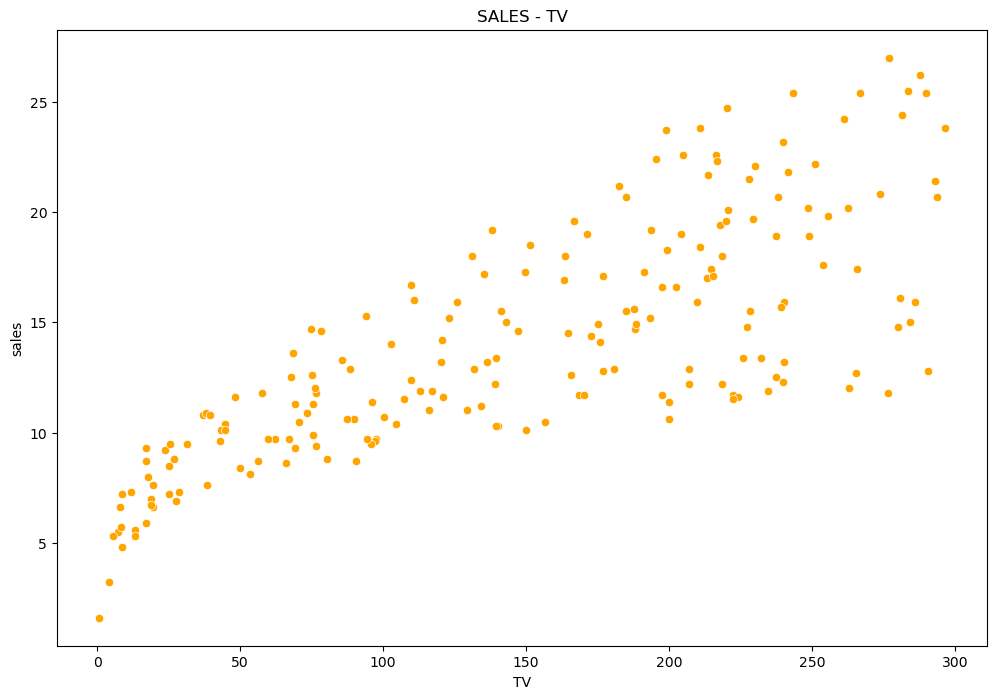

In [75]:
# plot

plt.figure(figsize=(12, 8))

sns.scatterplot(data=data, x='TV', y='sales', color='orange')

plt.title('SALES - TV')
plt.show()

#### 5- Build the model

$$ y = \beta_0 + \beta_1X $$

The most widely used Python package in the world in Machine Learning: **Scikit-Learn**

To install Scikit-Learn:

`conda install -c anaconda scikit-learn`

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [76]:
# sklearn LinearRegression

from sklearn.linear_model import LinearRegression

In [77]:
# create linear regression object

lr = LinearRegression()

#### 6- Preparation

We need to check the shape.

shape -> `(n_samples, n_features)`

shape -> `(n, p)`

In [78]:
# Let's first look at the size of input and output.

print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (200,)
shape of y: (200,)


As you can see, the shape is not what sklearn's LinearRegression class wants.

In [79]:
# we need to reshape
# as (200, 1) 

X = X.values.reshape(-1, 1)

In [80]:
# new shape of X

print("shape of X:", X.shape)

shape of X: (200, 1)


In [81]:
# Let's also reshape the label (output) variable

y = y.values.reshape(-1, 1)

In [82]:
# new shape of X

print("shape of y:", y.shape)

shape of y: (200, 1)


#### 7- Train-Test Split

We will divide our total of 200 data into two as Train-Test.

Train: 70%

Test: 30%

Train Data: X_train, y_train

Test Data: X_test, y_test

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [83]:
# import from scikit-learn

from sklearn.model_selection import train_test_split

In [84]:
# train data
# X_train, y_train

# test_data
# X_test, y_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [85]:
# shapes

print("shape of X_train:", X_train.shape)
print("shape of y_train:", y_train.shape)

print("shape of X_test:", X_test.shape)
print("shape of y_test:", y_test.shape)

shape of X_train: (140, 1)
shape of y_train: (140, 1)
shape of X_test: (60, 1)
shape of y_test: (60, 1)


In [86]:
# type of X_train

type(X_train)

numpy.ndarray

#### 8- Run Linear Regression Model (Fit)

In [87]:
# run regression -> fit
# fit -> learning
# via train data

lr.fit(X_train, y_train)

LinearRegression()

#### 9- Calculating Coefficients (intercept_, coef_)

The purpose of fitting Linear Regression is to calculate the coefficients.

$\beta_0$ -> intercept

$\beta_1$ -> slope (coefficient)

In [88]:
# intercept -> beta 0

print('intercept:', lr.intercept_)

intercept: [6.98966586]


In [89]:
# slope = coefficient -> beta 1

print('slope (coeffificent):', lr.coef_)

slope (coeffificent): [[0.04649736]]


$$ y = 6.989 + 0.0464 X $$

#### 10- Predict

Now that we have calculated our regression coefficients, we can predict the y's based on the test data (X_test).

`y_pred`

The real y's stand as y_test.

We will use them to check the accuracy of our prediction.

In [90]:
# prediction

y_pred = lr.predict(X_test)

In [91]:
# print prediction

y_pred

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323],
       [12.4391563 ],
       [17.66080969],
       [ 9.60281742],
       [15.72186983],
       [11.04423554],
       [11.36971705],
       [13.95032046],
       [14.90351632],
       [14.59198401],
       [12.23921766],
       [16.97264878],
       [13.00642408],
       [16.07524976],
       [15.21969836],
       [15.58702749],
       [17.23303399],
       [17.20978531],
       [10.49091697],
       [15.58702749],
       [12.71349072],
       [10.1700852 ],
       [10.19798361],
       [12.61584627],
       [15.74976825],
       [ 9.31453379],
       [12.59259759],
       [11.50920913],
       [14.81982107],
       [17.33067844],
       [15.97295557],
       [17.00519693],
       [15.15925179],
       [14.63848137],
       [17.14933874],
       [12.57864838],
       [11

In [92]:
# shape of prediction data

y_pred.shape

(60, 1)

In [93]:
# shape of test data (original data)
# y_true

y_test.shape

(60, 1)

#### 11- Plot original Data and Prediction Data

Now we are talking about test data, that is, the real world.

We're done with train data. So we learned.

Real Label -> y_test

Prediction Label -> y_pred

Input -> X_test

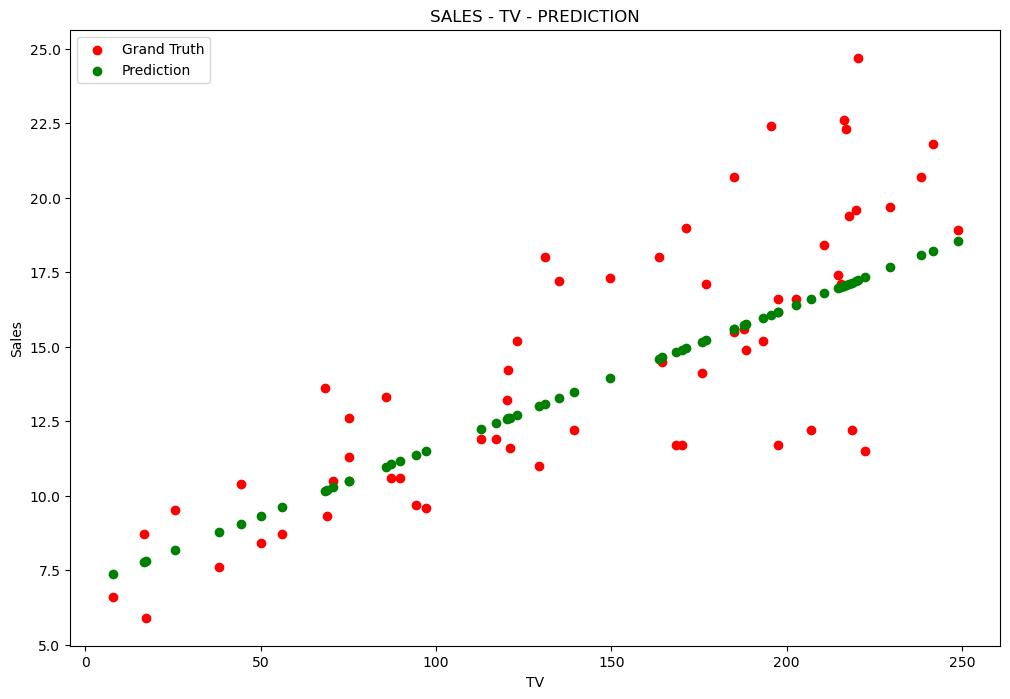

In [94]:
# Real Data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test, y_test, label='Grand Truth', color='red')

# Prediction
ax.scatter(X_test, y_pred, label='Prediction', color='green')

plt.title('SALES - TV - PREDICTION')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

In [95]:
# Let's see the first 10 real y values

y_test[0:10]

array([[ 6.6],
       [20.7],
       [17.2],
       [19.4],
       [21.8],
       [12.2],
       [12.2],
       [11.7],
       [22.6],
       [22.3]])

In [96]:
# Let's see the top 10 prediction values

y_pred[0:10]

array([[ 7.35234526],
       [18.06533671],
       [13.27610876],
       [17.11214086],
       [18.22807747],
       [16.60531965],
       [13.4620982 ],
       [16.17754395],
       [17.05169429],
       [17.07029323]])

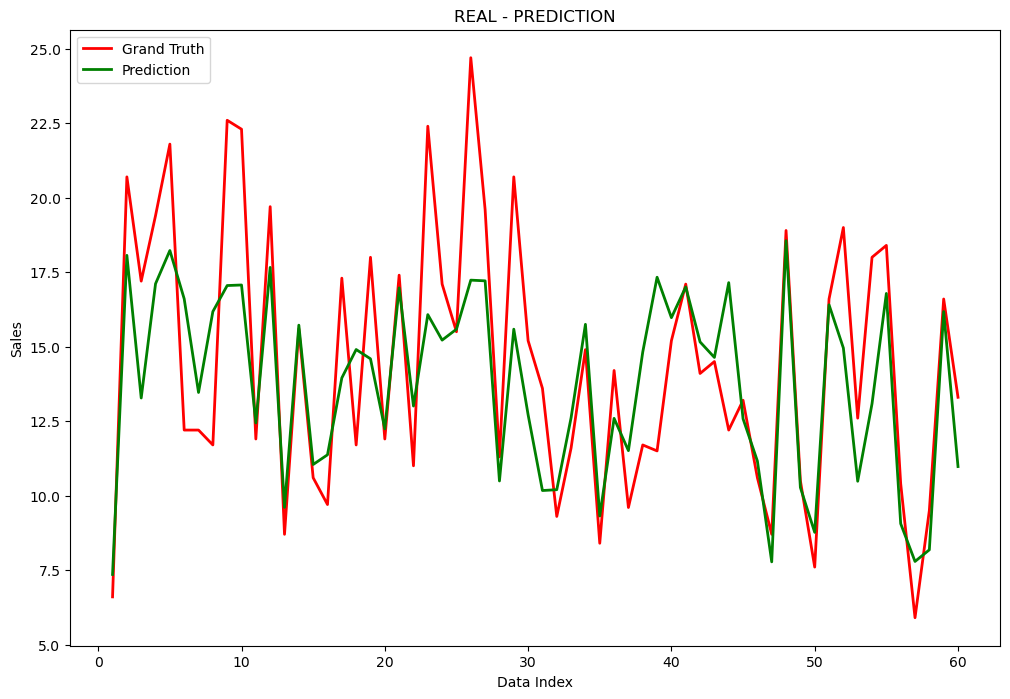

In [97]:
# Let's see the change at each prediction point
indexler = range(1,61)

# real data -> Grand Truth
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test, label='Grand Truth', color='red', linewidth=2)

# Prediction
ax.plot(indexler, y_pred, label='Prediction', color='green', linewidth=2)

plt.title('REAL - PREDICTION')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#### 12- Plot Errors ($y - \hat y$)

error : Residual -> ($y - \hat y$)

**y_test - y_pred**

In [98]:
import numpy as np

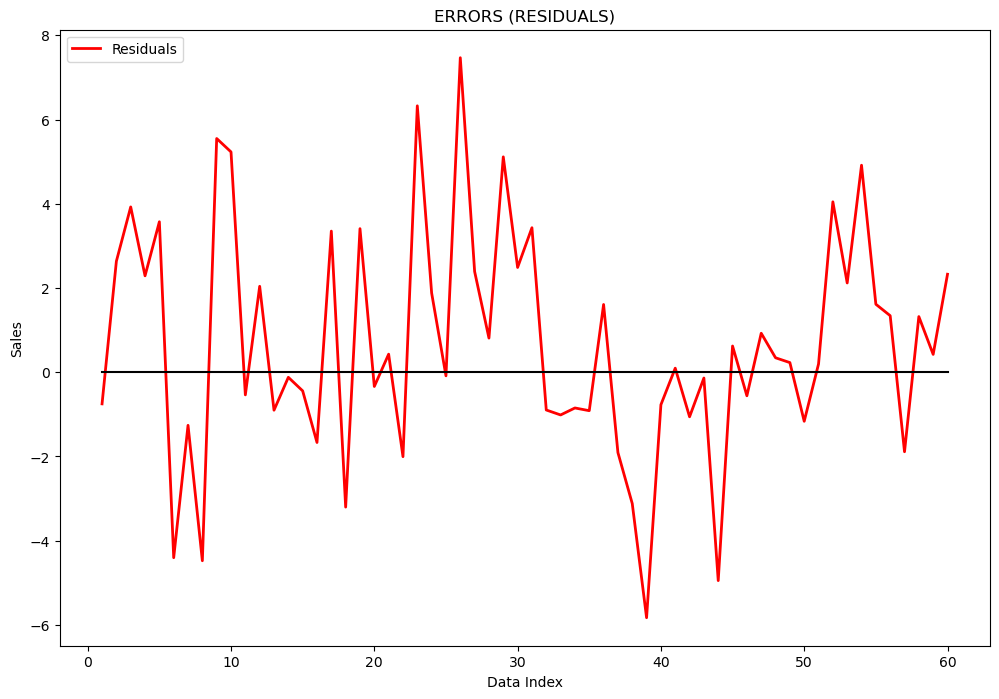

In [109]:
# Let's see the error at each prediction point
indexler = range(1,61)

# Residuls 
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(indexler, y_test - y_pred, label='Residuals', color='red', linewidth=2)

# plot the zero line
ax.plot(indexler, np.zeros(60), color='black')

plt.title('ERRORS (RESIDUALS)')
plt.xlabel('Data Index')
plt.ylabel('Sales')
plt.legend(loc='upper left')
plt.show()

#### 13- Check Model Accuracy (RMSE, ve $R^2$)

**RMSE**: Root Mean Squared Error

It's actually the square root of the MSE we saw before.

$R^2$: `coefficient of determination`.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [100]:
# import sklearn

from sklearn.metrics import r2_score, mean_squared_error

In [101]:
# Let's calculate R^2

r_2 = r2_score(y_test, y_pred)

In [102]:
# print R^2

print('R^2:', r_2)

R^2: 0.5942987267783302


In [103]:
# print as R^2 % 

print('R^2 %:', r_2 * 100)

R^2 %: 59.42987267783302


In [104]:
# MSE -> RMSE

mse = mean_squared_error(y_test, y_pred)

In [105]:
# print MSE

print('MSE:', mse)

MSE: 7.97579853285485


In [106]:
# RMSE

import math
rmse = math.sqrt(mse)

In [107]:
# print RMSE

print('RMSE:', rmse)

RMSE: 2.8241456288327007


#### 14- Comments

**$R^2$ = %59.43**

output

So almost, 60%.

This means:

Our model represents 60% of the real data. Not bad rate. Of course, it varies depending on the domain.

**RMSE = 2.82**

output

So almost, 60%.

This means:

Our model represents 60% of the real data. Not bad rate. Of course, it varies depending on the domain.